# 일별, 주별, 월별 구매구분별 매출액 및 구매자 수 계산.


### 일별, 주별, 월별 매출액
1. paid_date 컬럼의 null 값인 행을 없앤다.
  
  → 날짜를 유추할 수 없기 때문에 없애버린다.
2. paid_date 매출액을 합한다.
  
  → 같은 날 구매한 경우라도 여러번 구매한 경우는 데이터가 따로 되어 있어 합친다.
3. paid_date 컬럼에 날짜 전체가 있지 않고 중간중간 비어있어 날짜를 null 값으로 채운다.
  
  → 그래프로 보았을 때 값이 있는 날짜만 붙어서 보이므로 중간에 null값 날짜를 채워 넣는다.



### 일별, 주별, 월별 구독자 수
1. paid_date 컬럼의 null 값인 행을 없앤다.
  
  → 날짜를 유추할 수 없기 때문에 없애버린다.
2. user_idx의 중복값을 없앤다.
  
  → 동일한 구독자가 여러번 있을 수 있으므로 중복제거를 한다.
3. paid_date의 user_idx 수를 센다.
  
  → 구독자의 수를 구하는 것이므로 해당날짜의 user_idx의 수를 센다.
4. paid_date 컬럼에 날짜 전체가 있지 않고 중간중간 비어있어 날짜를 null 값으로 채운다.
  
  → 그래프로 보았을 때 값이 있는 날짜만 붙어서 보이므로 중간에 null값 날짜를 채워 넣는다.
  


### 구매 구분별 매출액 및 구매자 수
1. paid_date 컬럼의 null 값인 행을 없앤다.
  
  → 날짜를 유추할 수 없기 때문에 없애버린다.
2. 구독자 수로 묶어서 매출액을 합친다.
  
  → 동일한 구독자가 여러번 있을 수 있으므로 중복제거를 한다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
total_df = pd.DataFrame()
payment_df = pd.read_csv('./payment_window.csv', encoding='CP949')
bra_df = pd.read_csv('./bra_size_window.csv', encoding='CP949')
user_df = pd.read_csv('./user_window.csv', encoding='CP949')
pay_bra_df = pd.merge(payment_df, bra_df, how='outer', on='user_idx')
total_df = pd.merge(pay_bra_df, user_df, on='user_idx')
drop_cols = ['Unnamed: 0_x', 'Unnamed: 0', 'Unnamed: 0_y']
total_df.drop(drop_cols, axis=1, inplace=True)
total_df.reset_index(drop=True, inplace=True)

total_df['paid_date'] = pd.to_datetime(total_df['paid_date'])
total_df['joined_date'] = pd.to_datetime(total_df['joined_date'])
total_df['created_date'] = pd.to_datetime(total_df['created_date'])

# total_df['year'] = total_df['paid_date'].dt.year
# total_df['month'] = total_df['paid_date'].dt.month
# total_df['day'] = total_df['paid_date'].dt.day
# total_df['week'] = total_df['paid_date'].dt.dayofweek
# total_df[['year', 'month', 'week', 'day', 'order_total_price']]

In [3]:
print(payment_df.shape)
display(payment_df.head())
display(payment_df.describe().T)
print(payment_df.info())

(7308, 7)


,Unnamed: 0,user_idx,subscription_type,cart_discount_price,order_shipping_price,order_total_price,paid_date
0,1,0973f573635c1b55a58f1d221f992bfeb0b3e007a93efb...,구독,5100,3000,12900,2020-10-21
1,2,305181c0babb5077b46ccb298a41469729a6760b19e44d...,구독,5100,3000,12900,2020-10-09
2,3,5fa450bdb2e831617f0132293d63638e0f93f1f62af4ca...,구독,5100,3000,12900,2020-10-11
3,4,85649b91d8ac8d2e84faa6c54032254356fe02c69d5fa0...,구독,5100,3000,12900,2020-10-14
4,5,05afd1abc70fce9afaa18482a0bb9c6cb082e65b1e0ab4...,구독,5100,3000,12900,2020-10-21


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7308.0,3654.500000,2109.782216,1.0,1827.75,3654.5,5481.25,7308.0
cart_discount_price,7308.0,3267.939245,2729.677090,0.0,0.00,5100.0,5100.00,15000.0
order_shipping_price,7308.0,2970.443350,296.324772,0.0,3000.00,3000.0,3000.00,3000.0
order_total_price,7308.0,14658.949097,3071.579009,0.0,12900.00,12900.0,18000.00,27900.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7308 entries, 0 to 7307
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            7308 non-null   int64 
 1   user_idx              7308 non-null   object
 2   subscription_type     7277 non-null   object
 3   cart_discount_price   7308 non-null   int64 
 4   order_shipping_price  7308 non-null   int64 
 5   order_total_price     7308 non-null   int64 
 6   paid_date             7308 non-null   object
dtypes: int64(4), object(3)
memory usage: 399.8+ KB
None


## 일별 매출액, 구독자 수 구하기

,order_total_price
paid_date,
2020-08-31,18000.0
2020-09-01,NaN
2020-09-02,NaN
2020-09-03,NaN
2020-09-04,NaN
...,...
2020-10-27,2712600.0
2020-10-28,2866200.0
2020-10-29,2683200.0


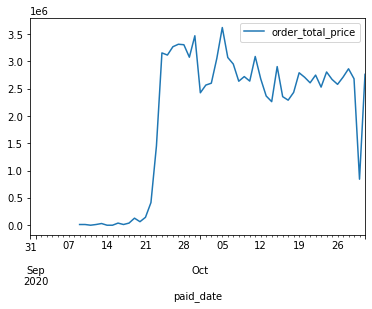

In [4]:
date_price_df = total_df.groupby(['paid_date'])[['order_total_price']].sum()
day_price_df = date_price_df.asfreq('D')
display(day_price_df)
day_price_df.plot()
plt.show()

,user_idx
paid_date,
2020-08-31,1.0
2020-09-01,NaN
2020-09-02,NaN
2020-09-03,NaN
2020-09-04,NaN
...,...
2020-10-27,107.0
2020-10-28,117.0
2020-10-29,105.0


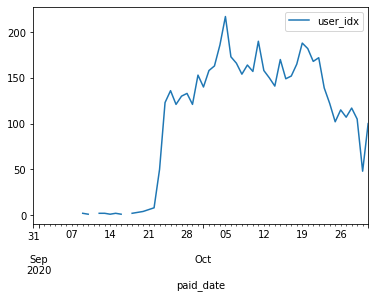

In [5]:
# 구매자 수
dupli_total_df = total_df.drop_duplicates(subset=['user_idx'], keep='first')
date_price_df = dupli_total_df.groupby(['paid_date'])[['user_idx']].count()
day_price_df = date_price_df.asfreq('D')
display(day_price_df)
day_price_df.plot()
plt.show()

## 주별 매출액, 구매자 수 구하기

,order_total_price
paid_date,
2020-09-06,NaN
2020-09-13,30900.0
2020-09-20,64500.0
2020-09-27,3315800.0
2020-10-04,3056100.0
2020-10-11,3091200.0
2020-10-18,2433900.0
2020-10-25,2670900.0


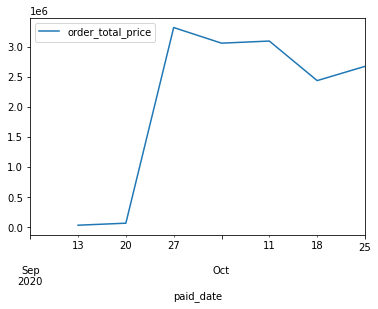

In [6]:
date_price_df = total_df.groupby(['paid_date'])[['order_total_price']].sum()
week_price_df = date_price_df.asfreq('W')
display(week_price_df)
week_price_df.plot()
plt.show()

,user_idx
paid_date,
2020-09-06,NaN
2020-09-13,2.0
2020-09-20,4.0
2020-09-27,130.0
2020-10-04,186.0
2020-10-11,190.0
2020-10-18,165.0
2020-10-25,102.0


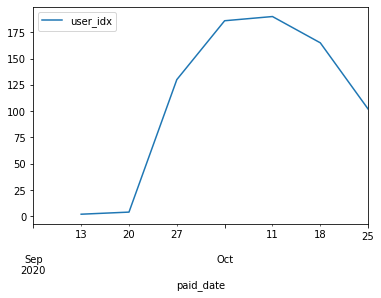

In [7]:
dupli_total_df = total_df.drop_duplicates(subset=['user_idx'], keep='first')
date_price_df = dupli_total_df.groupby(['paid_date'])[['user_idx']].count()
week_price_df = date_price_df.asfreq('W')
display(week_price_df)
week_price_df.plot()
plt.show()

## 월별 매출액, 구매자 수 구하기

,order_total_price
paid_date,
2020-08-31,18000.0
2020-09-30,3471300.0
2020-10-31,2764500.0


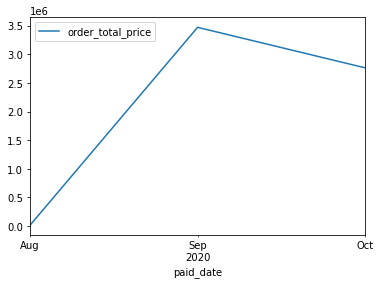

In [8]:
date_price_df = total_df.groupby(['paid_date'])[['order_total_price']].sum()
month_price_df = date_price_df.asfreq('M')
display(month_price_df)
month_price_df.plot()
plt.show()

,user_idx
paid_date,
2020-08-31,1
2020-09-30,153
2020-10-31,100


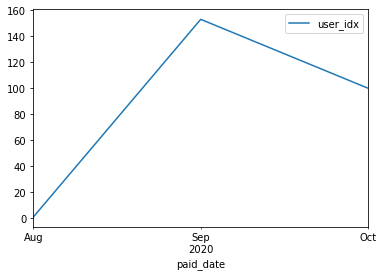

In [9]:
dupli_total_df = total_df.drop_duplicates(subset=['user_idx'], keep='first')
date_price_df = dupli_total_df.groupby(['paid_date'])[['user_idx']].count()
month_price_df = date_price_df.asfreq('M')
display(month_price_df)
month_price_df.plot()
plt.show()

## 구매 구분별 매출액 및 구매자 수

In [10]:
total_df['subscription_type'].fillna('미구독', inplace=True)

subscription_type
구독     107127600.0
미구독            0.0
Name: order_total_price, dtype: float64

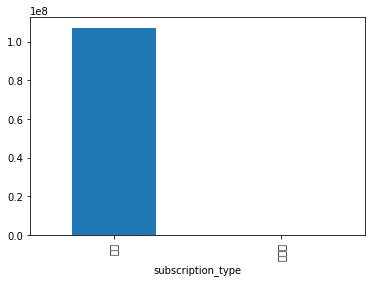

In [11]:
total_day_df = total_df.groupby(['subscription_type'])['order_total_price'].sum()
display(total_day_df)

total_day_df.plot(kind='bar')
plt.show()

subscription_type
구독     7277
미구독    9922
Name: user_idx, dtype: int64

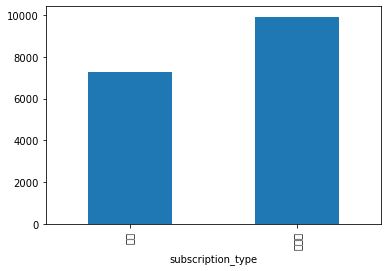

In [12]:
total_day_df = total_df.groupby(['subscription_type'])['user_idx'].count()
display(total_day_df)

total_day_df.plot(kind='bar')
plt.show()

In [13]:
total_df['subscription_type'].value_counts()

미구독    9922
구독     7277
Name: subscription_type, dtype: int64